# HEADER
# HEADER
# HEADER
# HEADER
# HEADER

<hr>

# Configure APSIM

### Install APSIM

xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx xxxxxxxxxxxxxxxxx 

### Install apsimx

In [2]:
# devtools::install_github("femiguez/apsimx")
library("apsimx")

### List all APSIM simulation examples

In [47]:
# Get apsim examples folder
ex_dir <- auto_detect_apsimx_examples()
print(list.files(ex_dir))

 [1] "AgPasture.apsimx"             "Agroforestry"                
 [3] "Barley.apsimx"                "Canola.apsimx"               
 [5] "CanolaGrazing.apsimx"         "Chickpea.apsimx"             
 [7] "Chicory.apsimx"               "CLEM"                        
 [9] "ControlledEnvironment.apsimx" "CsvWeather.apsimx"           
[11] "Eucalyptus.apsimx"            "EucalyptusRotation.apsimx"   
[13] "Factorial.apsimx"             "FodderBeet.apsimx"           
[15] "Grapevine.apsimx"             "Graph.apsimx"                
[17] "Maize.apsimx"                 "ManagerExamples"             
[19] "Mungbean.apsimx"              "Oats.apsimx"                 
[21] "OilPalm.apsimx"               "Optimisation"                
[23] "Peanut.apsimx"                "Pinus.apsimx"                
[25] "PlantainForage.apsimx"        "Potato.apsimx"               
[27] "RedClover.apsimx"             "Rotation.apsimx"             
[29] "SCRUM.apsimx"                 "Sensitivity"             

### Let's copy one of the simulations and work on it

First, we need to set the name of the simulation to be copied and the new name after renamed

In [3]:
ORIGINAL_SIM_NAME <- "Soybean.apsimx"
SIM_NAME          <- "Soybean-tests.apsimx"

Then, copy simulation example to current folder

In [32]:
file.copy(
    paste0(ex_dir, "/", ORIGINAL_SIM_NAME), 
    paste0("./", SIM_NAME)
)

[1] TRUE

<hr>

# Inspect Simulation Nodes

Available "node" values: 
- "Clock"
- "Weather"
- "Soil"
- "SurfaceOrganicMatter"
- "MicroClimate"
- "Crop"
- "Manager"
- "Report"
- "Other"

Available "soil.child" values:
- "Metadata"
- "Water"
- "InitialWater"
- "Chemical"
- "Physical"
- "Analysis"
- "SoilWater"
- "InitialN"
- "CERESSoilTemperature"
- "Sample"
- "Nutrient"
- "Organic"

### Inspect Crop

In [50]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Crop"
)



|parm         |value |
|:------------|:-----|
|StartDate    |3-sep |
|EndDate      |3-dec |
|MinESW       |100   |
|MinRain      |25    |
|RainDays     |7     |
|CultivarName |Davis |
|SowingDepth  |50    |
|RowSpacing   |750   |
|Population   |38    |


### Inspect Clock

In [51]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Clock"
)

Start: 1900-01-01T00:00:00 
End: 2000-12-31T00:00:00 


### Inspect Weather

In [52]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Weather"
)

Met file: %root%\Examples\WeatherFiles\Dalby.met 


### Inspect Soil

In [53]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Soil"
)

Soil Type:  Clay 
Latitude:  -27.58184 
Longitude:  151.3202 
Soil children: Physical SoilWater Organic Chemical InitialWater InitialN Temperature Nutrient 


|parm              |value                                                  |
|:-----------------|:------------------------------------------------------|
|$type             |Models.Soils.Soil, Models                              |
|RecordNumber      |0                                                      |
|ASCOrder          |Vertosol                                               |
|ASCSubOrder       |Black                                                  |
|SoilType          |Clay                                                   |
|LocalName         |NA                                                     |
|Site              |Norwin                                                 |
|NearestTown       |Norwin                                                 |
|Region            |Darling Downs and Granite Belt                     

### Inspect Surface Organic Matter 

In [54]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "SurfaceOrganicMatter"
)



|parm                    |value |
|:-----------------------|:-----|
|InitialResidueName      |maize |
|InitialResidueType      |maize |
|InitialResidueMass      |100   |
|InitialStandingFraction |0     |
|InitialCPR              |0     |
|InitialCNR              |55    |


### Inspect Micro Climate

In [55]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "MicroClimate"
)



|parm                         |value |
|:----------------------------|:-----|
|a_interception               |0     |
|b_interception               |1     |
|c_interception               |0     |
|d_interception               |0     |
|soil_albedo                  |0.23  |
|SoilHeatFluxFraction         |0.4   |
|MinimumHeightDiffForNewLayer |0     |
|NightInterceptionFraction    |0.5   |


### Inspect Manager

In [56]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Manager"
)

Management Scripts:  SowingFertiliser Harvesting SowingRule 



NOTE: This manager node contains 3 parameters (SowingFertiliser, Harvesting and SowingRule). We can explore some of them.

In [57]:
# Manager SowingFertiliser
inspect_apsimx(
    file = SIM_NAME, 
    node = "Manager",
    parm = list("SowingFertiliser", NA)
)

Management Scripts:  SowingFertiliser Harvesting SowingRule 

Name:  SowingFertiliser 


|parm     |value   |
|:--------|:-------|
|Amount   |10      |
|CropName |soybean |



In [58]:
# Manager SowingRule
inspect_apsimx(
    file = SIM_NAME, 
    node = "Manager",
    parm = list("SowingRule", NA)
)

Management Scripts:  SowingFertiliser Harvesting SowingRule 

Name:  SowingRule 


|parm         |value |
|:------------|:-----|
|StartDate    |3-sep |
|EndDate      |3-dec |
|MinESW       |100   |
|MinRain      |25    |
|RainDays     |7     |
|CultivarName |Davis |
|SowingDepth  |50    |
|RowSpacing   |750   |
|Population   |38    |



### Inspect Report

In [59]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Report"
)

Report name: HarvestReport 


|VariableNames                        |
|:------------------------------------|
|[Clock].Today                        |
|[Soybean].Phenology.Stage            |
|[Soybean].Phenology.CurrentStageName |
|[Soybean].AboveGround.Wt             |
|[Soybean].AboveGround.N              |
|[Soybean].Grain.Total.Wt*10 as Yield |
|[Soybean].Grain.NConc                |
|[Soybean].Grain.Size                 |
|[Soybean].Grain.Number               |
|[Soybean].Grain.Total.Wt             |
|[Soybean].Grain.Total.N              |
|[Soybean].Total.Wt                   |


|EventNames           |
|:--------------------|
|[Soybean].Harvesting |



<hr>

# Obtain meteorological data from NASA POWER

If you don't have **nasapower** library installed, use the command **install.packages("nasapower")**

In [24]:
library("nasapower")

Define latitude and longitude of the field, as well as the start and end dates:

In [25]:
lonlat <- c(-52.9, -28.23)

dates <- c("2015-01-01", "2018-04-10")

<div class="alert">
  <span class="closebtn" onclick="this.parentElement.style.display='none';">&#9888;</span>
  IMPORTANT: The function <b>get_power_apsim_met</b> below will download the .met file to the current folder. The filename of this file can be set in the parameter <b>filename</b>. 
</div>

In [26]:
power_data <- get_power_apsim_met(
    lonlat = lonlat, 
    dates = dates,
    filename = "power.met"
)

View met data

In [27]:
head(power_data)

summary(power_data)

,year,day,radn,maxt,mint,rain,rh,windspeed
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015,1,5.85,26.61,22.24,109.49,93.50,4.23
2,2015,2,14.07,23.25,16.67,2.89,86.56,2.70
3,2015,3,27.98,27.05,14.29,0.05,72.75,1.50
4,2015,4,32.09,28.86,16.41,0.00,76.06,1.77
5,2015,5,28.96,29.50,16.85,4.66,79.75,1.41
6,2015,6,29.91,27.23,21.09,0.34,86.00,2.14


year,months,days,high_maxt,high_mint,avg_maxt,avg_mint,low_maxt,low_mint,rain_sum,radn_sum,radn_avg
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2015,1:12,1:31,31.94,22.46,24.62,14.38,12.20,0.55,1636.16,5752.51,15.76
2016,1:12,1:31,30.89,22.87,23.66,13.14,10.48,-2.52,1591.54,6262.68,17.11
2017,1:12,1:31,32.10,22.58,24.62,13.90,9.40,-3.91,2090.74,6304.86,17.27
2018,1:12,1:31,32.48,21.48,27.53,17.07,22.32,10.98,507.69,2082.03,20.82


### Plot meteorological data

For a fast plot of met data, you can use the **plot** function:

,year,day,radn,maxt,mint,rain,rh,windspeed
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015,1,5.85,26.61,22.24,109.49,93.50,4.23
2,2015,2,14.07,23.25,16.67,2.89,86.56,2.70
3,2015,3,27.98,27.05,14.29,0.05,72.75,1.50
4,2015,4,32.09,28.86,16.41,0.00,76.06,1.77
5,2015,5,28.96,29.50,16.85,4.66,79.75,1.41
6,2015,6,29.91,27.23,21.09,0.34,86.00,2.14


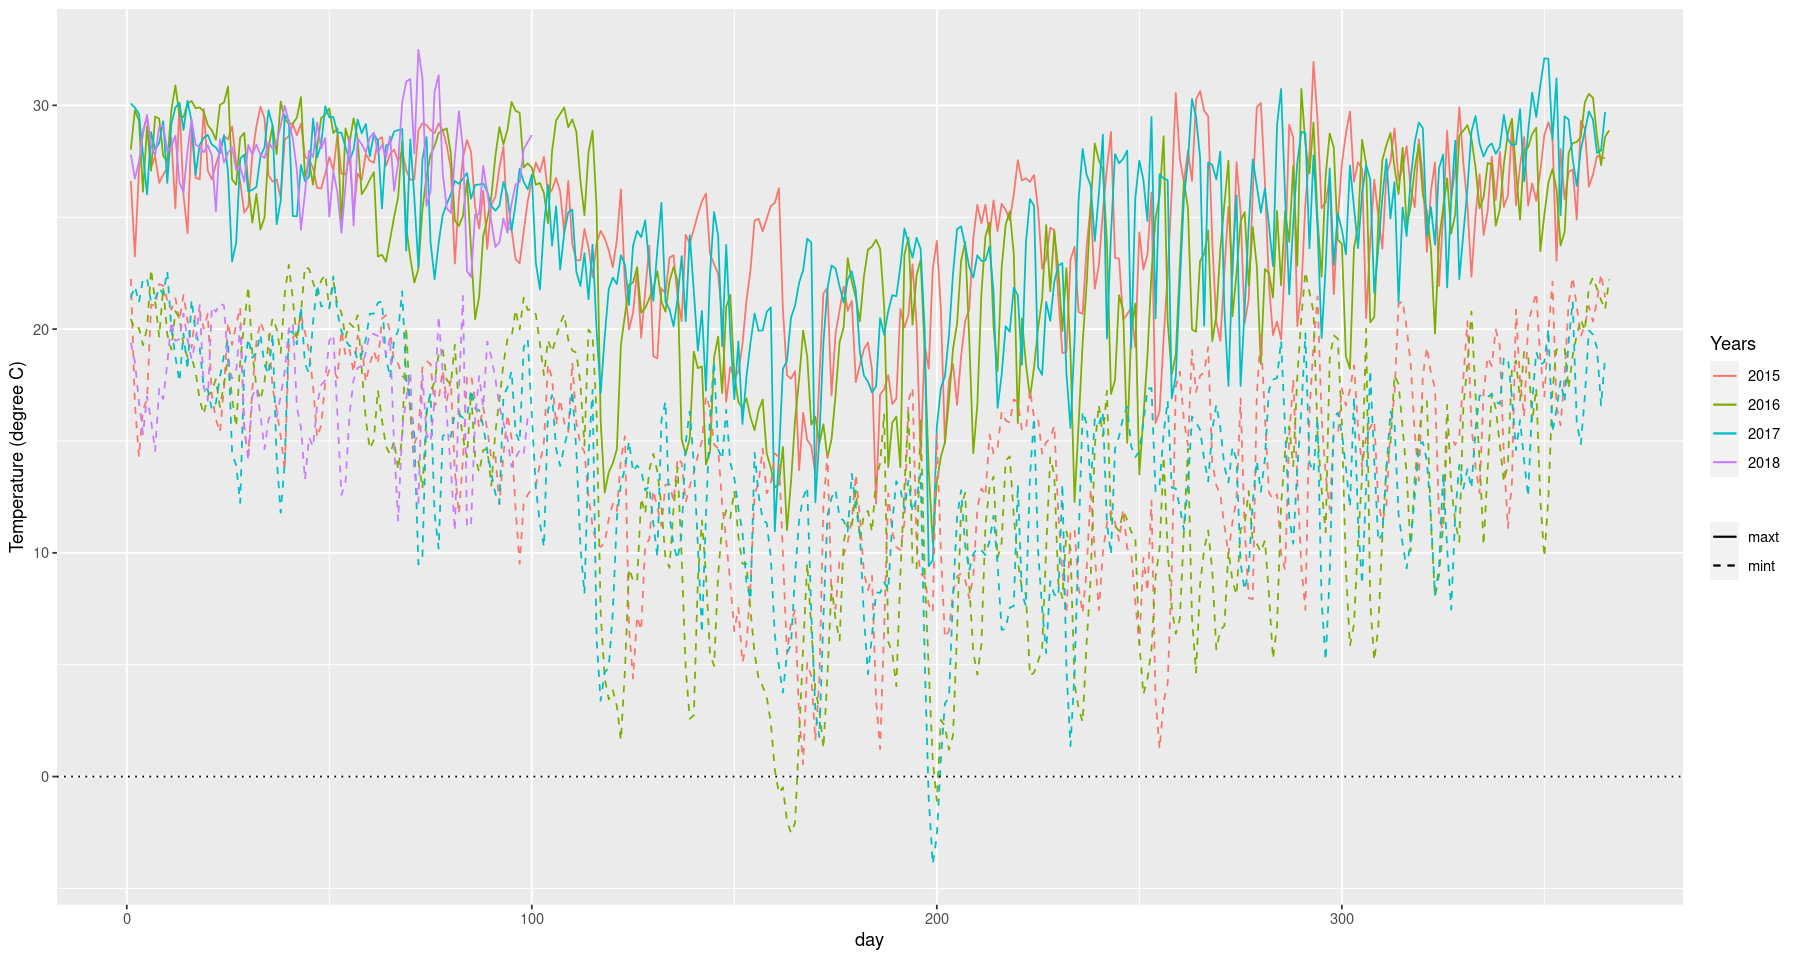

In [28]:
options(repr.plot.width=15, repr.plot.height=8)

plot(power_data)

head(power_data)

We can also plot data using ggplot. To do this, we can pivot columns to rows in a tidy format and plot data using facet_grid.

In [31]:
head(power_data)

df_power <- tidyr::pivot_longer(power_data, cols = -c(year, day), names_to = "variable", values_to = "value")

head(df_power)

,year,day,radn,maxt,mint,rain,rh,windspeed
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2015,1,5.85,26.61,22.24,109.49,93.50,4.23
2,2015,2,14.07,23.25,16.67,2.89,86.56,2.70
3,2015,3,27.98,27.05,14.29,0.05,72.75,1.50
4,2015,4,32.09,28.86,16.41,0.00,76.06,1.77
5,2015,5,28.96,29.50,16.85,4.66,79.75,1.41
6,2015,6,29.91,27.23,21.09,0.34,86.00,2.14


year,day,variable,value
<dbl>,<int>,<chr>,<dbl>
2015,1,radn,5.85
2015,1,maxt,26.61
2015,1,mint,22.24
2015,1,rain,109.49
2015,1,rh,93.50
2015,1,windspeed,4.23


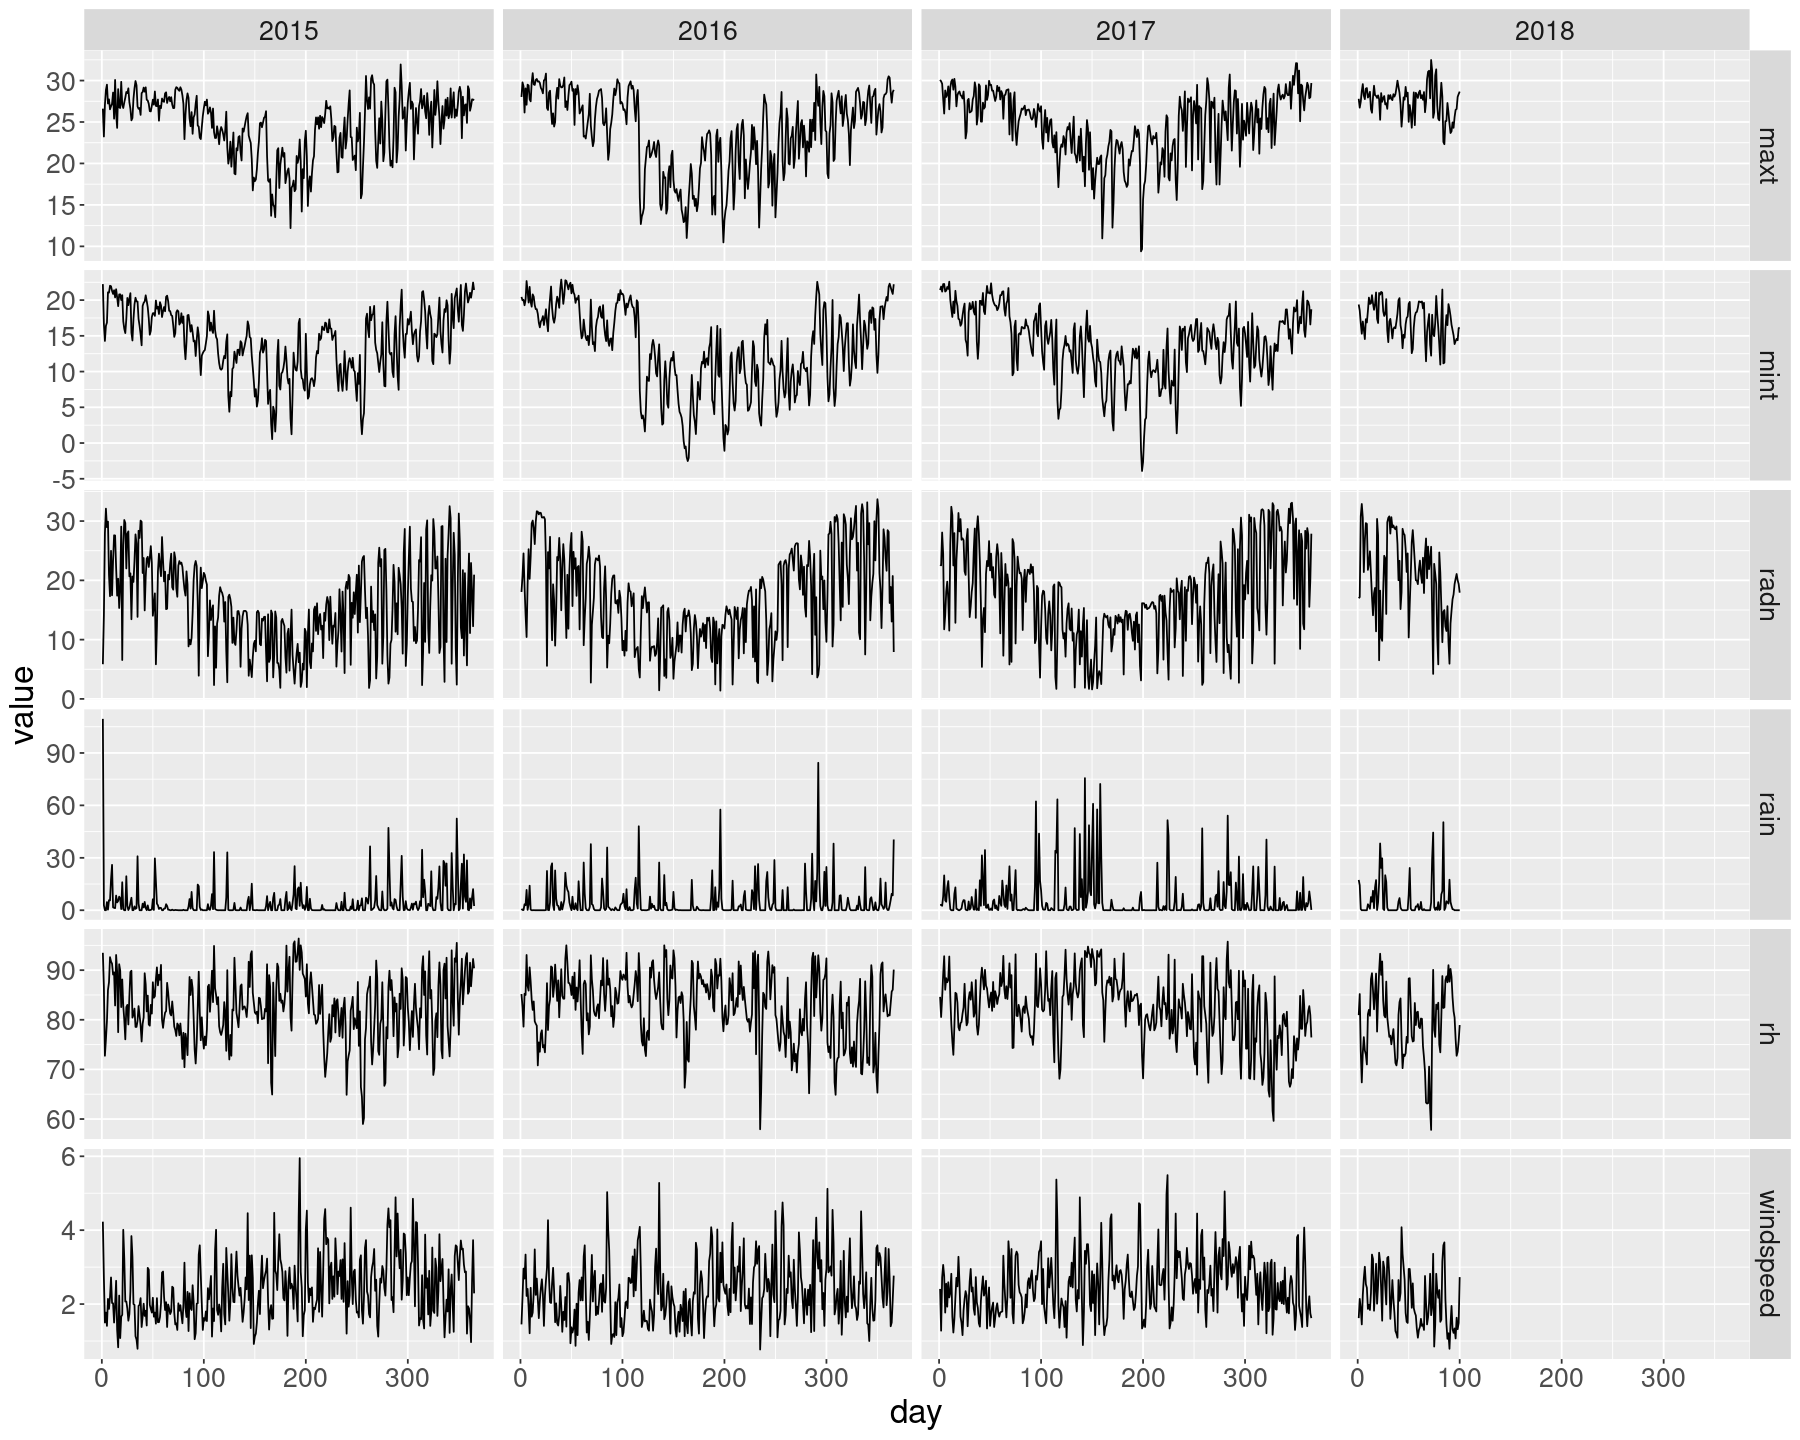

In [32]:
# Plot 

options(repr.plot.width=15, repr.plot.height=12)

ggplot(df_power) + 
    geom_line(aes(x = day, y = value)) +
    facet_grid(variable ~ year, scales = "free_y") +
    theme(text = element_text(size = 20))

### Use this generated weather file in our model

CHeck which file is being used currently:

In [33]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Weather"
)

Met file: ./power.met 


Update met and inspect again if the change was done:

In [34]:
edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Weather", 
    value = "./power.met"
)

Edited (node):  Weather 
Edited (child):  none 
Edited parameters:  
New values:  ./power.met 
Created:  ./Soybean-tests.apsimx 


Inspect again to check if the met file to be usedin simulation was updated:

In [35]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Weather"
)

Met file: ./power.met 


# Obtain Soil Data from ISRIC (International Soil Reference and Information Centre)

Set coordinates, get soil profile and view:

In [23]:
lonlat <- c(-52.90, -28.23)

In [25]:
isric_soil <- get_isric_soil_profile(
    lonlat = lonlat
)

In [42]:
head(isric_soil)

Depth,Thickness,BD,AirDry,LL15,DUL,SAT,KS,Carbon,SoilCNRatio,⋯,Maize.LL,Maize.XF,Soybean.KL,Soybean.LL,Soybean.XF,Wheat.KL,Wheat.LL,Wheat.XF,CEC,Nitrogen
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
0-5,50,1.03,0.1217828,0.2435655,0.3758188,0.4547182,126.50597,5.78,12,⋯,0.2435655,1,0.06000000,0.2435655,1,0.06000000,0.2435655,1,233,437
5-15,100,1.08,0.2565085,0.2565085,0.3886890,0.4625238,103.17656,2.85,12,⋯,0.2565085,1,0.04912385,0.2565085,1,0.04912385,0.2565085,1,190,240
15-30,150,1.14,0.2677019,0.2677019,0.3995050,0.4700243,89.38960,2.02,12,⋯,0.2677019,1,0.04021920,0.2677019,1,0.04021920,0.2677019,1,192,208
30-60,300,1.17,0.3040410,0.3040410,0.4321012,0.4930030,56.41276,1.24,12,⋯,0.3040410,1,0.03292870,0.3040410,1,0.03292870,0.3040410,1,177,125
60-100,400,1.21,0.3192580,0.3192580,0.4456555,0.5038253,48.70834,0.93,12,⋯,0.3192580,1,0.02695974,0.3192580,1,0.02695974,0.3192580,1,174,90
100-200,1000,1.22,0.3170131,0.3170131,0.4436521,0.5019924,49.21887,0.94,12,⋯,0.3170131,1,0.02207277,0.3170131,1,0.02207277,0.3170131,1,176,80


Below we can check the profile information:

In [43]:
head(isric_soil$soil)

,Depth,Thickness,BD,AirDry,LL15,DUL,SAT,KS,Carbon,SoilCNRatio,⋯,Maize.LL,Maize.XF,Soybean.KL,Soybean.LL,Soybean.XF,Wheat.KL,Wheat.LL,Wheat.XF,CEC,Nitrogen
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,0-5,50,1.03,0.1217828,0.2435655,0.3758188,0.4547182,126.50597,5.78,12,⋯,0.2435655,1,0.06000000,0.2435655,1,0.06000000,0.2435655,1,233,437
2,5-15,100,1.08,0.2565085,0.2565085,0.3886890,0.4625238,103.17656,2.85,12,⋯,0.2565085,1,0.04912385,0.2565085,1,0.04912385,0.2565085,1,190,240
3,15-30,150,1.14,0.2677019,0.2677019,0.3995050,0.4700243,89.38960,2.02,12,⋯,0.2677019,1,0.04021920,0.2677019,1,0.04021920,0.2677019,1,192,208
4,30-60,300,1.17,0.3040410,0.3040410,0.4321012,0.4930030,56.41276,1.24,12,⋯,0.3040410,1,0.03292870,0.3040410,1,0.03292870,0.3040410,1,177,125
5,60-100,400,1.21,0.3192580,0.3192580,0.4456555,0.5038253,48.70834,0.93,12,⋯,0.3192580,1,0.02695974,0.3192580,1,0.02695974,0.3192580,1,174,90
6,100-200,1000,1.22,0.3170131,0.3170131,0.4436521,0.5019924,49.21887,0.94,12,⋯,0.3170131,1,0.02207277,0.3170131,1,0.02207277,0.3170131,1,176,80


<hr>

# Edit APSIM simulation



In this section we will edit parameters of the APSIM simulation using the package apsimx.

### Edit SowingRule start and end dates

First, we can inspect the parameter that we will edit.

In [ ]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Manager", 
    parm = list("SowingRule", NA)
)

Management Scripts:  SowingFertiliser Harvesting SowingRule 

Name:  SowingRule 


|parm         |value |
|:------------|:-----|
|StartDate    |3-sep |
|EndDate      |3-dec |
|MinESW       |100   |
|MinRain      |25    |
|RainDays     |7     |
|CultivarName |Davis |
|SowingDepth  |50    |
|RowSpacing   |750   |
|Population   |38    |



Edit parameters:

<div class="alert">
    <span class="closebtn" onclick="this.parentElement.style.display='none';">&#9888;</span>
    IMPORTANT: 
    <br>
    <br>
    Once you use the function <i>edit_apsimx</i> below with the parameter <i>overwrite</i> set to TRUE, the simulation file <i>.apsimx</i> will be overwritten. When set to FALSE, apsimx package create a new <i>.apsimx</i> simulation with edited values.
</div>

In [ ]:
# Edit Manager => SowingRule => StartDate
edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Manager", manager.child = "SowingRule", parm = "StartDate", 
    value = "3-sep"
)

# Edit Manager => SowingRule => EndDate
edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Manager", manager.child = "SowingRule", parm = "EndDate", 
    value = "3-dec"
)

Edited (node):  Manager 
Edited (child):  SowingRule 
Edited parameters:  StartDate 
New values:  3-sep 
Created:  ./Soybean-tests.apsimx 


Edited (node):  Manager 
Edited (child):  SowingRule 
Edited parameters:  EndDate 
New values:  3-dec 
Created:  ./Soybean-tests.apsimx 


Now we can check is the edit was successful:

In [8]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Manager", 
    parm = list("SowingRule", NA)
)

Management Scripts:  SowingFertiliser Harvesting SowingRule 

Name:  SowingRule 


|parm         |value |
|:------------|:-----|
|StartDate    |3-sep |
|EndDate      |3-dec |
|MinESW       |100   |
|MinRain      |25    |
|RainDays     |7     |
|CultivarName |Davis |
|SowingDepth  |50    |
|RowSpacing   |750   |
|Population   |38    |



### Edit Simulation Clock

Todo do this, we will again:
- Inspect node
- Edit node
- Inspect again to check if the parameter was edited

In [9]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Clock"
)

Start: 3-sep 
End: 2000-12-31T00:00:00 


In [12]:
edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Clock", parm = "Start", 
    value = "2015-01-01T00:00:00 "
)

edit_apsimx(
    file = SIM_NAME, wrt.dir = ".", overwrite = T,
    node = "Clock", parm = "End", 
    value = "2017-01-01T00:00:00 "
)

Edited (node):  Clock 
Edited (child):  none 
Edited parameters:  Start 
New values:  2015-01-01T00:00:00  
Created:  ./Soybean-tests.apsimx 


Edited (node):  Clock 
Edited (child):  none 
Edited parameters:  End 
New values:  2017-01-01T00:00:00  
Created:  ./Soybean-tests.apsimx 


In [13]:
inspect_apsimx(
    file = SIM_NAME, 
    node = "Clock"
)

Start: 2015-01-01T00:00:00  
End: 2017-01-01T00:00:00  


<hr>

# Run Simulation

Now that we have the .apsimx file configured and we set the simulation to use our .met file, we can run the simulation and check the results.

### Configure APSIM executable path

<div class="alert">
  <span class="closebtn" onclick="this.parentElement.style.display='none';">&#9888;</span>
   This executable is the APSIM binary file used to run simulations in command line. This executable file is also used by APSIM NG interface to run simulations.

   IMPORTANT: The APSIM executable path is not the APSIM NG .exe file.

   To find this executable file, please locate the bin folder inside your APSIM installation folder:
   - **Windows:** Usually inside <i>C:\\Program Files\\APSIM</i> or <i>C:\\Program Files (x86)\\APSIM</i>.
   - **Linux:** Usually inside <i>/usr/local/lib/apsim/2023.7.7283.0/</i>.
</div>

In [14]:
apsimx_options(exe.path = "~/git/ApsimX/bin/Release/net6.0/apsim")

### Run Simulation

In [36]:
apsim_results <- apsimx(
    file = SIM_NAME
)

summary(apsim_results)

  CheckpointID  SimulationID     Zone           Clock.Today       
 Min.   :1     Min.   :1     Length:1           Length:1          
 1st Qu.:1     1st Qu.:1     Class :character   Class :character  
 Median :1     Median :1     Mode  :character   Mode  :character  
 Mean   :1     Mean   :1                                          
 3rd Qu.:1     3rd Qu.:1                                          
 Max.   :1     Max.   :1                                          
 Soybean.Phenology.Stage Soybean.Phenology.CurrentStageName
 Min.   :11              Length:1                          
 1st Qu.:11              Class :character                  
 Median :11              Mode  :character                  
 Mean   :11                                                
 3rd Qu.:11                                                
 Max.   :11                                                
 Soybean.AboveGround.Wt Soybean.AboveGround.N     Yield     
 Min.   :1344           Min.   :43.72         Min.

<hr>

# Plot Simulation Results

In [17]:
library(ggplot2)
library(gridExtra)

You can check below that the simulation results is in a dataframe format:

In [37]:
head(apsim_results)

,CheckpointID,SimulationID,Zone,Clock.Today,Soybean.Phenology.Stage,Soybean.Phenology.CurrentStageName,Soybean.AboveGround.Wt,Soybean.AboveGround.N,Yield,Soybean.Grain.NConc,Soybean.Grain.Size,Soybean.Grain.Number,Soybean.Grain.Total.Wt,Soybean.Grain.Total.N,Soybean.Total.Wt,Date,SimulationName
,<int>,<int>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<chr>
1,1,1,paddock,2016-02-22 12:00:00,11,HarvestRipe,1344.195,43.72323,6045.87,0.06025047,0,0,604.587,36.42665,1551.69,2016-02-22,Simulation


In the example below, we will plot **Soybean.AboveGround.Wt** and **Yield**:

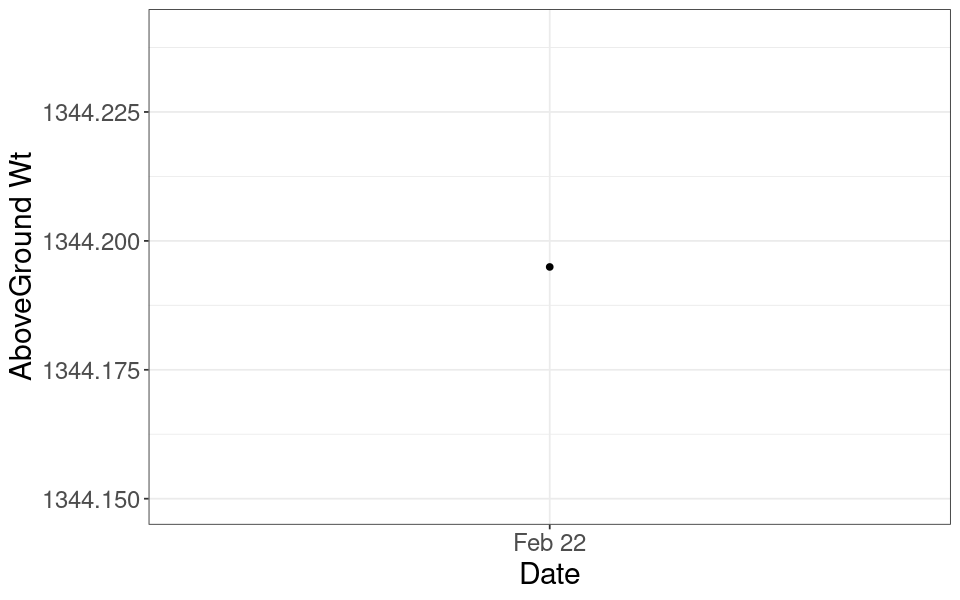

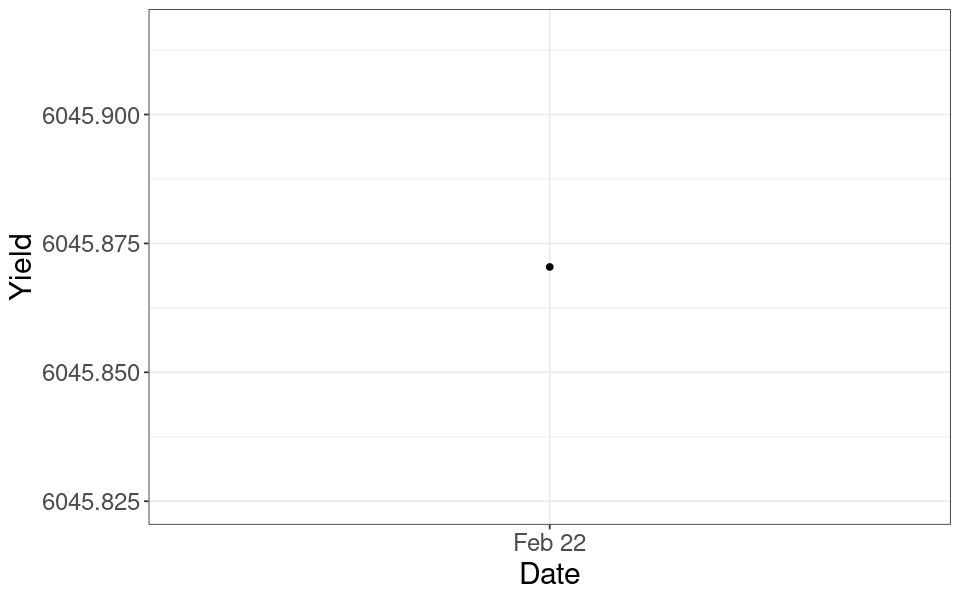

In [23]:
options(repr.plot.width=8, repr.plot.height=5)

ggplot(apsim_results) +
  # geom_line(aes(x = as.Date(Clock.Today), y = Soybean.AboveGround.Wt)) +
  geom_point(aes(x = as.Date(Clock.Today), y = Soybean.AboveGround.Wt)) +
  theme_bw() +
  labs(x = "Date", y = "AboveGround Wt") + 
  theme(text = element_text(size = 18))

ggplot(apsim_results) +
  # geom_line(aes(x = as.Date(Clock.Today), y = Yield)) +
  geom_point(aes(x = as.Date(Clock.Today), y = Yield)) +
  theme_bw() +
  labs(x = "Date", y = "Yield") + 
  theme(text = element_text(size = 18))

We can also use **dplyr** to convert this dataframe to a tibble format and plot all data using **ggplot**:

Date,variable,value
<date>,<chr>,<dbl>
1901-02-21,Soybean.AboveGround.N,18.8993676
1901-02-21,Soybean.AboveGround.Wt,576.4185567
1901-02-21,Soybean.Grain.NConc,0.0693626
1901-02-21,Soybean.Grain.Total.N,12.2757869
1901-02-21,Soybean.Grain.Total.Wt,176.9799027
1901-02-21,Soybean.Total.Wt,687.2769260


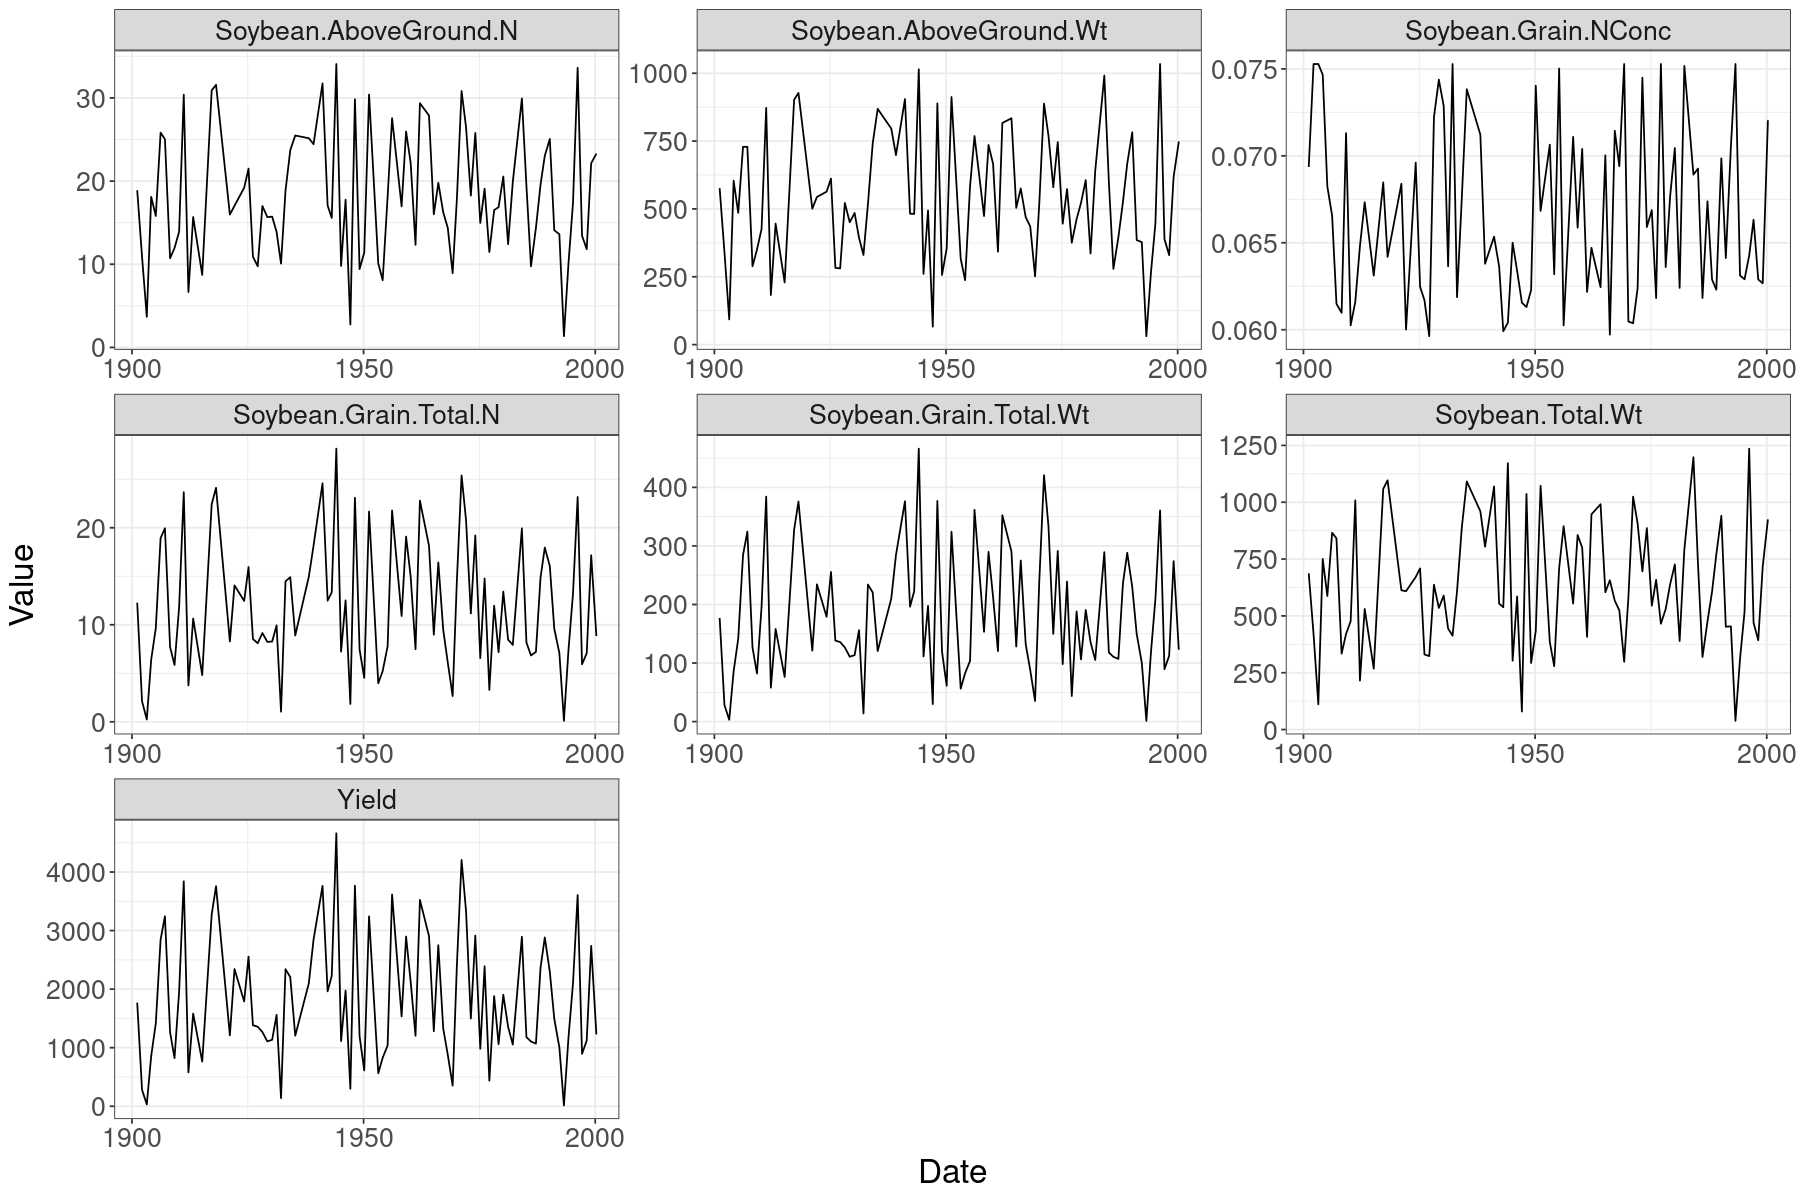

In [93]:
apsim_results_tibble <- apsim_results %>%
    select(Date, Soybean.AboveGround.N, Soybean.AboveGround.Wt, Soybean.Grain.NConc, Soybean.Grain.Total.N, Soybean.Grain.Total.Wt, Soybean.Total.Wt, Yield) %>%
    pivot_longer(cols = 2:ncol(.), names_to = "variable", values_to = "value")

head(apsim_results_tibble)


options(repr.plot.width=15, repr.plot.height=10)
ggplot(apsim_results_tibble) +
  geom_line(aes(x = Date, y = value)) +
  theme_bw() +
  facet_wrap(variable ~ ., scales="free") + 
  labs(x = "Date", y = "Value") + 
  theme(text = element_text(size = 20))